# TABLE OF CONTENTS
[1. IMPORTING LIBRARIES](#sec-1)

[2. DATA LOADING](#sec-2)

[3. DATA CLEANING](#sec-3)
 
* [3.1. Understand data](#sub-3-1)
 
* [3.2. Check and Impute missing values](#sub-3-2)
 
* [3.3. Cleaning data](#sub-3-3)
 
* [3.4. Feature EDA](#sub-3-4)

* [3.5. Correlation](#sub-3-5)
 
[4. DATA PREPROCESSING](#sec-4)

* [4.1. Label enconding the categorical columns](#sub-4-1)
 
* [4.2. Scale data using Standard Scaler](#sub-4-2)
 
[5. DIMENSIONALITY REDUCTION BY PCA](#sec-5)
 
* [5.1. Perform PCA with the chosen number of components](#sub-5-1)
 
* [5.2. Plot PCA with 3 components](#sub-5-2)
 
[6. CLUSTERING](#sec-6)

* [6.1. Find number of clusters](#sub-6-1)
 
* [6.2. Find the best clustering method](#sub-6-2)
 
* [6.3. Plot clusters of Kmeans clustering](#sub-6-3)
 
[7. EVALUATING](#sec-7)

* [7.1. Distribution of clusters](#sub-7-1)
 
* [7.2. Clusters based on *Income* and *Total Spent*](#sub-7-2)
 
* [7.3. Clusters based on products spending](#sub-7-3)
 
* [7.4. Clusters based on Promotions](#sub-7-4)
 
* [7.5. Clusters based on Number of Deals Purchased](#sub-7-5)
 
[8. PROFILING](#sec-8)
 
[9. CONCLUSION](#sec-9)

<a id="sec-1"></a> <br>
# 1. IMPORT LIBRARIES

In [79]:
# Import the common Libraries 
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Import color pallet and theme
import matplotlib.colors
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
cmap = matplotlib.colors.ListedColormap(pal)

# Import libraries for pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Import libraries for clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
import plotly.graph_objects as go

#Remove warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

np.random.seed(42)

<a id="sec-2"></a> <br>
# 2. DATA LOADING

In [80]:
# Read the dataset
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

<a id="sec-3"></a>
# 3. DATA CLEANING
<a id="sub-3-1"></a>
## 3.1. Understand data

In [81]:
# Hiển thị vài dòng dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [82]:
# Kiểm tra số dòng và cột dataset
df.shape

(2240, 29)

In [83]:
# Đặt lại tên 1 số cột
df = df.rename(columns = {'MntWines' : 'Wines',
                          'MntFruits' : 'Fruits',
                          'MntMeatProducts' : 'Meat',
                          'MntFishProducts' : 'Fish',
                          'MntSweetProducts' : 'Sweets',
                          'MntGoldProds' : 'Gold'})
# In ds các cột
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [84]:
# Tạo ds tên cột dựa trên kiểu dữ liệu
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

bool_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

category_columns = ['Education', 'Marital_Status']

date_columns = ['Year_Birth', 'Dt_Customer']

In [85]:
# Kiểm tra các thông tin cơ bản của dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Note:
* Có các giá trị bị thiếu trong cột **Income**
* **Dt_Customer** chưa đúng định dạng Date Time

<a id="sub-3-2"></a>
## 3.2. Check and Impute missing values

In [86]:
#Check missing values in columns
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Note: 
In the **Income** column, there are **24** missing values. We are going to impute the missing values with the mean method.

In [87]:
# In ra các giá trị bị thiếu trong cột 'Income'
income_missing = df[df['Income'].isna()]
income_missing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [88]:
# Tính giá trị trung bình của thu nhập được nhóm theo trình độ học vấn
group_means = df.groupby('Education')['Income'].mean()

# Điền các giá trị còn thiếu trong cột "Income"
df['Income'] = df['Income'].fillna(df['Education'].map(group_means))

In [89]:
# Kiểm tra lại các giá trị còn thiếu trong dataset
print('Missing data: ', df.isna().sum().sum())

Missing data:  0


<a id="sub-3-3"></a>
## 3.3. Cleaning data

* Tạo thuộc tính mới "**Days_since_enrolment**" để biết số ngày kể từ khi khách hàng bắt đầu mua sắm.
* Tạo thuộc tính mới "**Age**" để xác định độ tuổi khách hàng
* Tạo thuộc tính mới "**Spent**" để biết tổng số tiền mà khách hàng đã chi tiêu cho nhiều danh mục khác nhau trong 2 năm.
* Nhóm "**Marital Status**"về 2 trạng thái: "Alone" and "Partner".
* Tạo thuộc tính mới  "**Children**" để chỉ tổng số con trong hộ gia đình.
* Tạo thuộc tính mới "**Family_Size**" chỉ tổng số thành viên trong gia đình.
* Tạo thuộc tính mới "**Is_Parent**"  để biết khách hàng có là cha mẹ hay không.
* Đơn giản hóa thuộc tính"**Education**"
* Xóa các thuộc tính không cần thiết (Dt_Customer, Z_CostContact, Z_Revenue, Year_Birth, ID).


In [90]:
# Chuyển đổi cột 'Dt_Customer' thành định dạng ngày giờ
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Tìm giá trị Max và Min của cột 'Dt_Customer'
max_date = df['Dt_Customer'].max() 
min_date = df['Dt_Customer'].min()
print("The newest customer's enrolment date in the records:", max_date)
print("The oldest customer's enrolment date in the records:", min_date)

# Tính số ngày kể từ lúc khách hàng bắt đầu mua hàng
df['Days_since_enrolment'] = df['Dt_Customer'].apply(lambda x: (max_date - x).days) 

# Tính số tuổi của khách hàng
df['Age'] = 2022 - df['Year_Birth']


The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [91]:
# Đếm giá trị của các cột phân loại
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Values of Marital Status:  Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [92]:
# Nhóm tình trạng hôn nhân về 2 trạng thái là partner và Alone
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: "Partner" if x in {"Married", "Together"} else "Alone")


# Chia trình độ học vấn thành 3 nhóm Graduate, Postgraduate, Undergrade
df['Education'] = df['Education'].replace({'Basic' : 'Undergrade', 
                                           '2n Cycle' : 'Undergrade', 
                                           'Graduation' : 'Graduate', 
                                           'Master' : 'Postgraduate',
                                           'PhD' : 'Postgraduate'})

                                           
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Graduate        1127
Postgraduate     856
Undergrade       257
Name: Education, dtype: int64
Values of Marital Status:  Partner    1444
Alone       796
Name: Marital_Status, dtype: int64


In [93]:
# Tính tổng số con trong gia đình
df['Children'] = df['Kidhome'] + df['Teenhome']

# Tính tổng số thành viên tỏng gia đình
df['Family_Size'] = df['Marital_Status'].replace({"Alone" : 1, "Partner" : 2}) + df['Children']

# Tạo cột mới "Is_Parent" để đánh dấu là cha mẹ với đk số con > 0
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [94]:
# Tính tổng chi tiêu cho tất cả các loại sản phẩm
df['Spent'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

In [95]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,5524,1957,Graduate,Alone,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,663,65,0,1,0,1617
1,2174,1954,Graduate,Alone,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,113,68,2,3,1,27
2,4141,1965,Graduate,Partner,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,312,57,0,2,0,776
3,6182,1984,Graduate,Partner,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,139,38,1,3,1,53
4,5324,1981,Postgraduate,Partner,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,161,41,1,3,1,422


In [96]:
# to_drop = ['Unnamed: 0']
# df = df.drop(to_drop, axis = 1)

In [97]:
# Lưu thành file csv
df.to_csv('Marketing_end.csv', sep='\t', encoding='utf-8')

In [98]:
# Xóa 1 số thuộc tính dư thừa
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis = 1)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Marital_Status        2240 non-null   object 
 2   Income                2240 non-null   float64
 3   Kidhome               2240 non-null   int64  
 4   Teenhome              2240 non-null   int64  
 5   Recency               2240 non-null   int64  
 6   Wines                 2240 non-null   int64  
 7   Fruits                2240 non-null   int64  
 8   Meat                  2240 non-null   int64  
 9   Fish                  2240 non-null   int64  
 10  Sweets                2240 non-null   int64  
 11  Gold                  2240 non-null   int64  
 12  NumDealsPurchases     2240 non-null   int64  
 13  NumWebPurchases       2240 non-null   int64  
 14  NumCatalogPurchases   2240 non-null   int64  
 15  NumStorePurchases    

None

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52253.592375,25039.085601,1730.0,35538.75,51609.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
Wines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
Fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
Meat,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
Fish,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
Sweets,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
Gold,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0


#### Note:
In the **Income** column, there is a heavy varience between 75% and 100%.

In the **Age** column, the highest value is 129 which is unusual.

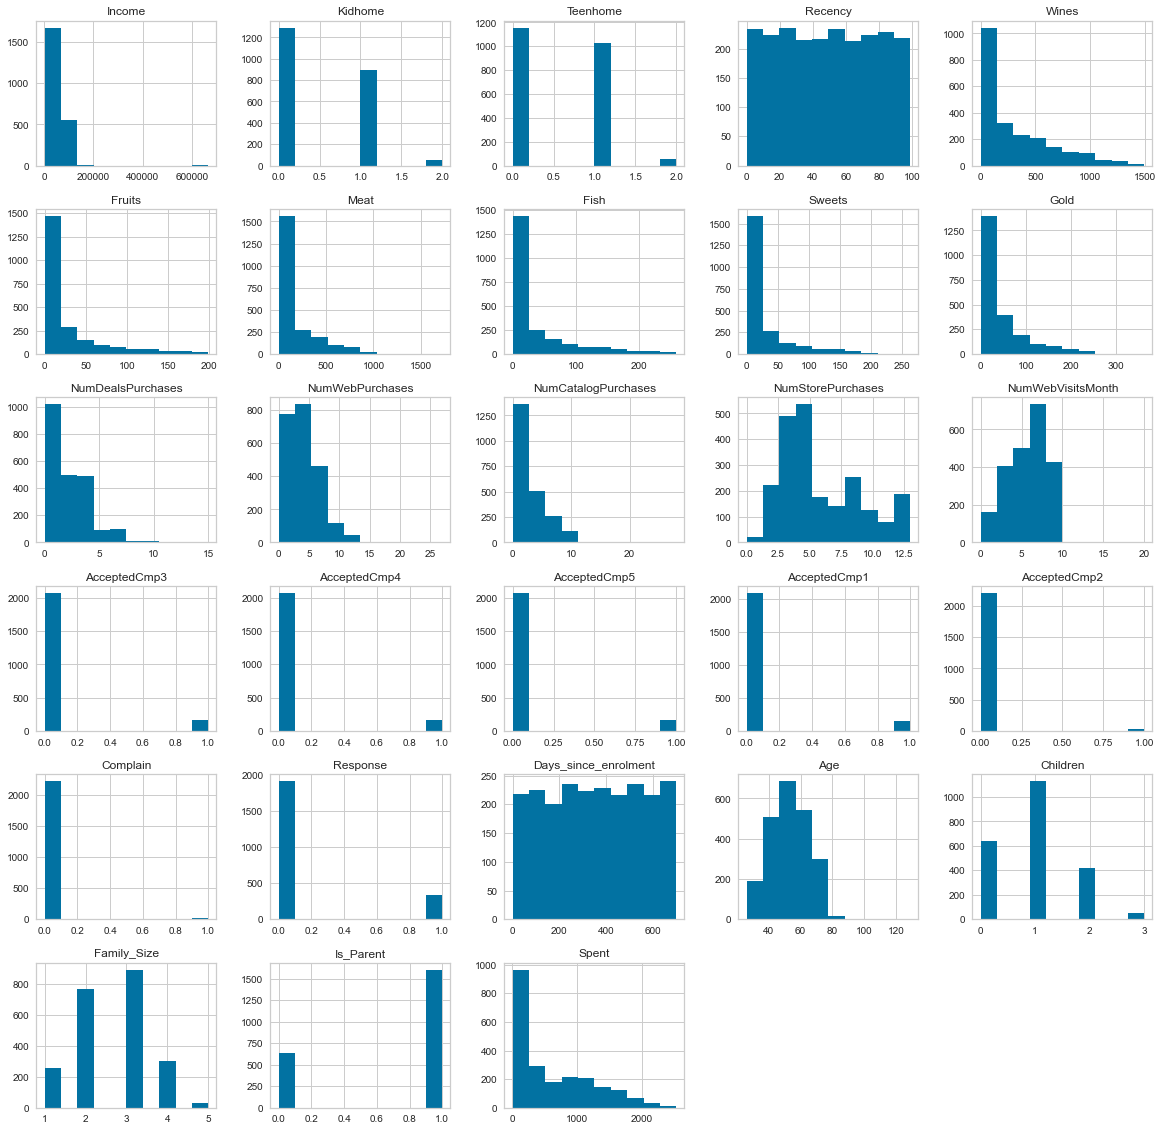

In [100]:
# Vẽ biểu đồ Hist để thể hiện phân bố của các biến số
df.hist(figsize=(20,20))
plt.show()

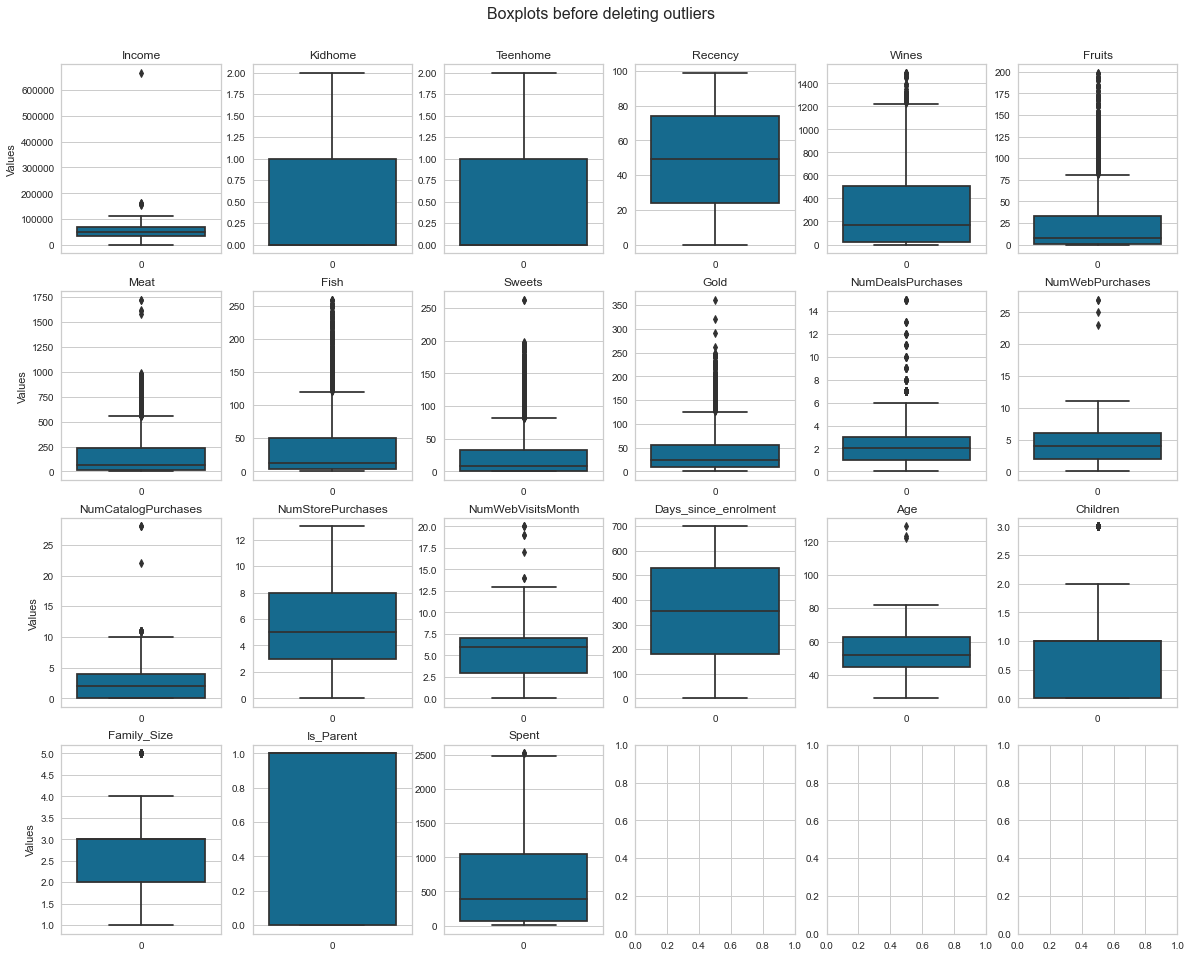

In [101]:
# Lấy các thuộc tính kiểu số
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Days_since_enrolment', 'Age', 'Children',
       'Family_Size', 'Is_Parent', 'Spent']

# Vẽ biểu đồ boxplot để phát hiển các giá trị bất thường
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=4, cols=6, suptitle='Boxplots before deleting outliers')

#### Note: 
Từ biểu đồ trên, chúng ta có thể thấy *tuổi > 90* và *thu nhập > 600000* là bất thường, do đó chúng ta cần loại bỏ chúng.

In [102]:
#Drop outliers by setting a cap in the 'Income' and 'Age' columns
df= df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]
print('The total number of data points after removing outliers:', len(df))

The total number of data points after removing outliers: 2236


<a id="sub-3-5"></a>
## 3.5. Correlation

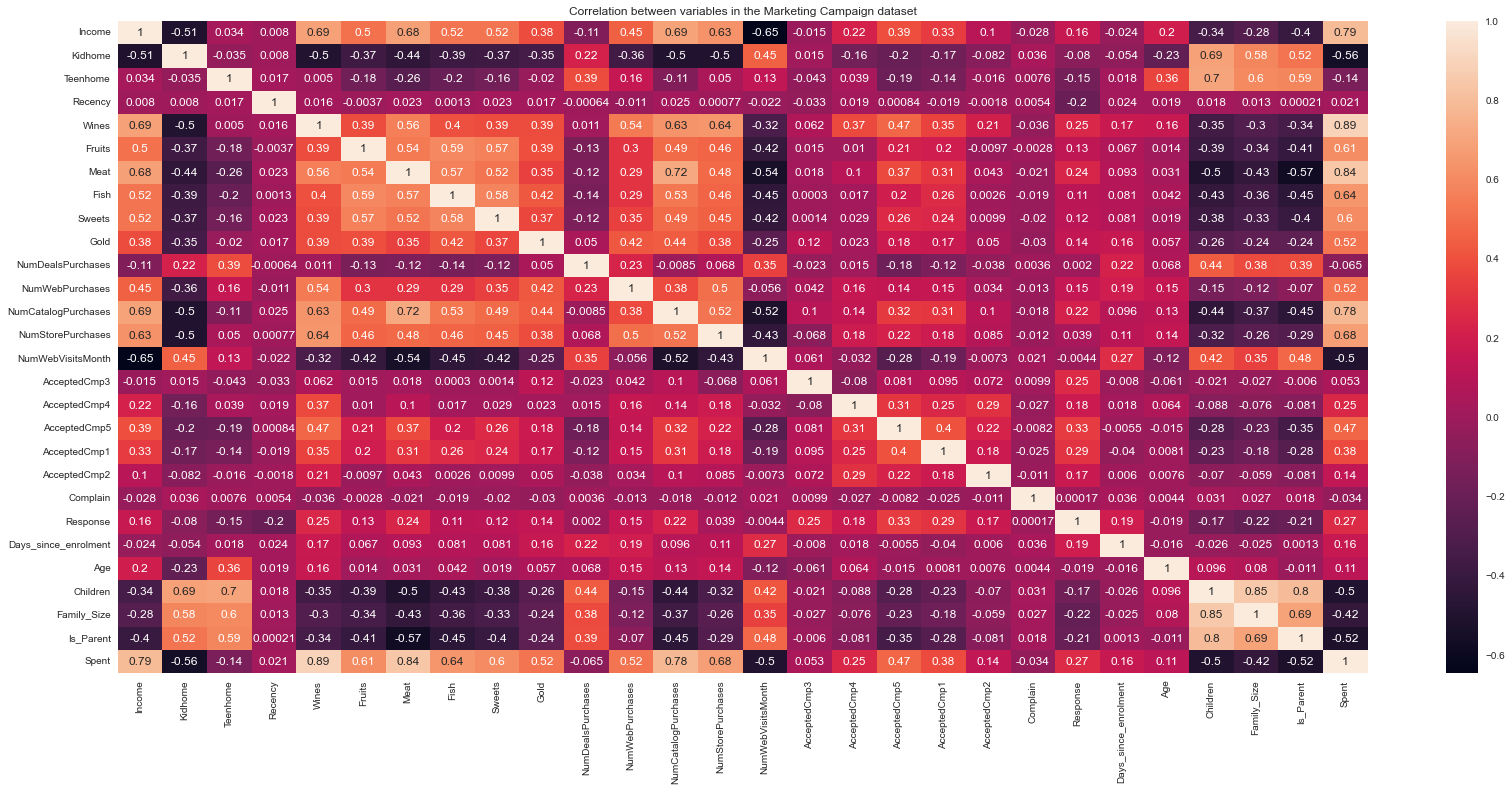

In [103]:
# Tìm mối tương quan giữa các biến. sử dụng heatmap
plt.figure(figsize=(28, 12))
sns.heatmap(df.corr(),
            annot = True)
plt.title('Correlation between variables in the Marketing Campaign dataset')
plt.show()



<a id="sec-4"></a>
# 4. DATA PRE-PROCESSING

<a id="sub-4-1"></a>

## 4.1. Label enconding the categorical columns

In [104]:
# Tạo đối tượng LabelEncoder
le = LabelEncoder()

# Sao chép tập dữ liệu gốc gán vào biến ds
ds = df.copy()
# Chọn các cột phân loại
categorical_cols = ds.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col]) # Mã hóa giá trị trong cột thành giá trị số
    
# Hiển thị thông tin về DataFrame
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2236 non-null   int32  
 1   Marital_Status        2236 non-null   int32  
 2   Income                2236 non-null   float64
 3   Kidhome               2236 non-null   int64  
 4   Teenhome              2236 non-null   int64  
 5   Recency               2236 non-null   int64  
 6   Wines                 2236 non-null   int64  
 7   Fruits                2236 non-null   int64  
 8   Meat                  2236 non-null   int64  
 9   Fish                  2236 non-null   int64  
 10  Sweets                2236 non-null   int64  
 11  Gold                  2236 non-null   int64  
 12  NumDealsPurchases     2236 non-null   int64  
 13  NumWebPurchases       2236 non-null   int64  
 14  NumCatalogPurchases   2236 non-null   int64  
 15  NumStorePurchases    

In [105]:
ds.head(12)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,0,0,58138.000000,0,0,58,635,88,546,172,...,0,0,0,1,663,65,0,1,0,1617
1,0,0,46344.000000,1,1,38,11,1,6,2,...,0,0,0,0,113,68,2,3,1,27
2,0,1,71613.000000,0,0,26,426,49,127,111,...,0,0,0,0,312,57,0,2,0,776
3,0,1,26646.000000,1,0,26,11,4,20,10,...,0,0,0,0,139,38,1,3,1,53
4,1,1,58293.000000,1,0,94,173,43,118,46,...,0,0,0,0,161,41,1,3,1,422
5,1,1,62513.000000,0,1,16,520,42,98,0,...,0,0,0,0,293,55,1,3,1,716
6,0,0,55635.000000,0,1,34,235,65,164,50,...,0,0,0,0,593,51,1,2,1,590
7,1,1,33454.000000,1,0,32,76,10,56,3,...,0,0,0,0,417,37,1,3,1,169
8,1,1,30351.000000,1,0,19,14,0,24,3,...,0,0,0,1,388,48,1,3,1,46
9,1,1,5648.000000,1,1,68,28,0,6,1,...,0,0,0,0,108,72,2,4,1,49


<a id="sub-4-2"></a>
## 4.2. Scale data using Standard Scaler

In [106]:
# Loại bỏ các cột boolean và gán vào biến df_before_scale
df_before_scale = ds.drop(bool_columns, axis = 1) # dataframe mới với các biến số

# Tạo đối tượng StandardScaler
scaler = StandardScaler()

# Chuẩn hóa 
scaled_data = scaler.fit_transform(df_before_scale)


# Tạo dataframe mới với dữ liệu đã được chuẩn hóa
df_scaled = pd.DataFrame(scaled_data, columns=df_before_scale.columns)

df_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_since_enrolment,Age,Children,Family_Size,Is_Parent,Spent
0,-0.89438,-1.347635,0.288195,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,1.407639,2.509801,-0.552429,0.692865,1.529793,1.016868,-1.264308,-1.758810,-1.584362,1.680176
1,-0.89438,-1.347635,-0.262715,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-1.110921,-0.568970,-1.167738,-0.131421,-1.191143,1.273264,1.395139,0.445618,0.631169,-0.962202
2,-0.89438,0.742041,0.917627,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,1.407639,-0.226884,1.293496,-0.543564,-0.206659,0.333146,-1.264308,-0.656596,-1.584362,0.282541
3,-0.89438,0.742041,-1.182829,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.751127,-0.911056,-0.552429,0.280722,-1.062517,-1.290693,0.065416,0.445618,0.631169,-0.918994
4,0.57070,0.742041,0.295435,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,0.328256,0.115201,0.062879,-0.131421,-0.953679,-1.034298,0.065416,0.445618,0.631169,-0.305762


<a id="sec-5"></a>
# 5. DIMENSIONALITY REDUCTION BY PCA
Principal Component Analysis (PCA) là phương pháp được sử dụng để làm giảm số chiều của 1 tập dữ liệu, giúp tăng cường khả năng diễn giải (trực quan đồ thị) và giảm thiểu mất mát thông tin.

<a id="sub-5-1"></a>


<a id="sub-5-3"></a>
## 5.1. Perform PCA with the chosen number of components

In [107]:
# Tạo đối tượng PCA với 3 chiều
pca = PCA(n_components = 3)

# Khớp mô hình với dữ liệu đã chuẩn hóa với 3 chiều
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled) # Biến đổi dữ liệu ban đầu thành các thành phần mới có số chiều là 3
df_pca = pd.DataFrame(df_pca, columns=['D1', 'D2', 'D3']) # Lưu vào DataFrame với 3 cột D1, D2, D3
df_pca

,D1,D2,D3
0,4.983479,-0.146408,2.434167
1,-2.862899,0.024342,-1.554093
2,2.622236,-0.734972,-0.258656
3,-2.641833,-1.456471,-0.348365
4,-0.646292,0.174618,-0.115216
...,...,...,...
2231,2.312048,2.434222,0.555281
2232,-3.098417,3.996647,-1.414510
2233,2.681520,-1.883289,0.500203
2234,1.489633,1.645567,-1.761027


<a id="sub-5-5"></a>
## 5.2. Plot PCA with 3 components

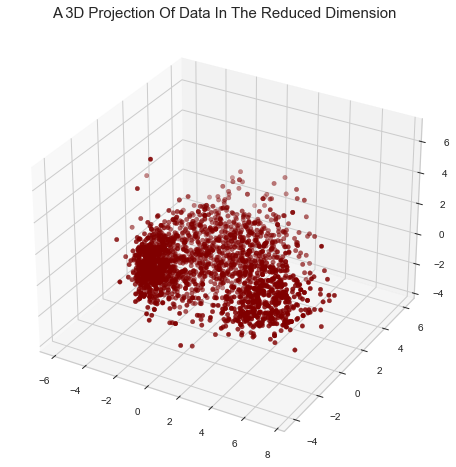

In [108]:
# A 3D Projection Of Data In The Reduced Dimension
x =df_pca["D1"]
y =df_pca["D2"]
z =df_pca["D3"]
# To plot
fig = plt.figure(figsize=(10,8))
a = fig.add_subplot(111, projection="3d")
a.scatter(x,y,z, c="maroon", marker="o" )
a.set_title("A 3D Projection Of Data In The Reduced Dimension", size=15)
plt.show()

<a id="sec-6"></a>
# 6. CLUSTERING
We have completed PCA and dimensionality reduction (but the explained variance was not very good). As a result, we can move on to clustering. To determine the best number of clusters to create, we will utilize the elbow method.

<a id="sub-6-1"></a>
## 6.1. Find number of clusters

Elbow Method to determine the number of clusters to be formed:


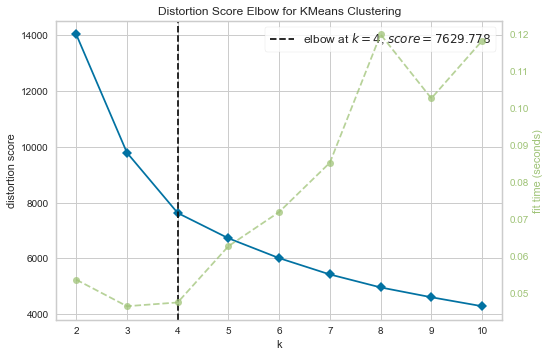

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

#### Note:
* Based on the above plot, it appears that the optimal number of clusters for this dataset is **4**.
* Our next step is to determine the most appropriate clustering method for this dataset.

<a id="sub-6-2"></a>
## 6.2. Find the best clustering method

In [110]:
# Define clustering methods
clustering_methods = [cluster.KMeans,
                      cluster.AgglomerativeClustering,
                      cluster.MeanShift,
                      cluster.AffinityPropagation,
                      cluster.SpectralClustering,
                      cluster.Birch
                     ]

data_arg = [(),(),(),(),(),(),()]


# Define parameters for each clustering method
clustering_para = [{'n_clusters':4},
                   {'n_clusters':4, 'linkage':'ward'},
                   {'cluster_all':False},
                   {'damping' : 0.9},
                   {'n_clusters':4},
                   {'threshold' : 0.01, 'n_clusters':4}
                  ]


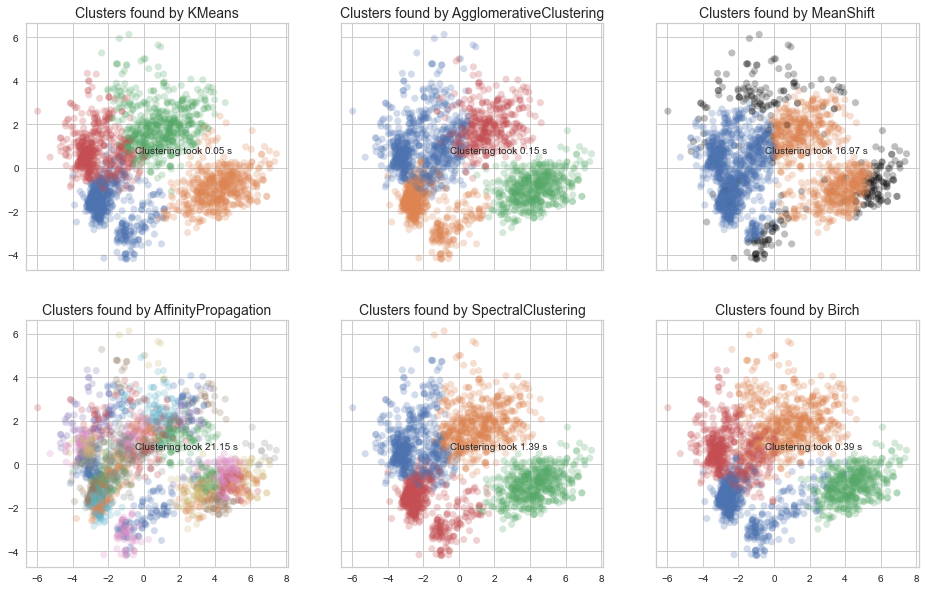

In [111]:
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm(*args[j], **kwds[j]).fit_predict(data)
        end_time = time.time()
        clusters_series.append(labels)
        
        #plotting
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]        
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        i.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)
    
    
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()


plot_clusters(data=df_pca, 
              algorithms=clustering_methods, 
              args=data_arg, 
              kwds=clustering_para, 
              axs=axs)


In [112]:
X = df_pca
# Compute the silhouette score for each method
for method, params in zip(clustering_methods, clustering_para):
    model = method(**params)
    y_pred = model.fit_predict(X)
    score = silhouette_score(X, y_pred)
    print(f"Silhouette score for {type(model).__name__}: {score:.3f}")


Silhouette score for KMeans: 0.374
Silhouette score for AgglomerativeClustering: 0.333
Silhouette score for MeanShift: 0.338
Silhouette score for AffinityPropagation: 0.270
Silhouette score for SpectralClustering: 0.367
Silhouette score for Birch: 0.347


#### Note:
The clustering methods show minimal variation and are relatively similar to each other, except for Affinity Propagation
Since KMeans has the highest Silhouette score of 0.374, we will use this method for clustering.

<a id="sub-6-3"></a>
## 6.3. Plot clusters of Kmeans clustering

In [113]:
#Choose KMeans method from clusters series above
df['Clusters'] = clusters_series[0]

In [114]:
fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=df['Clusters'],colorscale='Viridis',opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of kmeans model clusters",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

<a id="sec-7"></a>
# 7. EVALUATION MODELS
Vì đây là quá trình phân cụm không giám sát, nên không có đặc trưng được gán nhãn để sử dụng cho việc đánh giá hoặc tính điểm mô hình của chúng ta. Thay vào đó, mục tiêu của phần này là khám phá các mẫu trong các cụm được hình thành và hiểu bản chất của chúng. Để làm được điều này, chúng ta sẽ tiến hành phân tích dữ liệu khám phá để xem xét dữ liệu liên quan đến các cụm và rút ra kết luận từ những quan sát của chúng ta. Để bắt đầu, chúng ta sẽ xem xét phân bố của các nhóm trong các cụm.

<a id="sub-7-1"></a>
## 7.1. Distribution of clusters

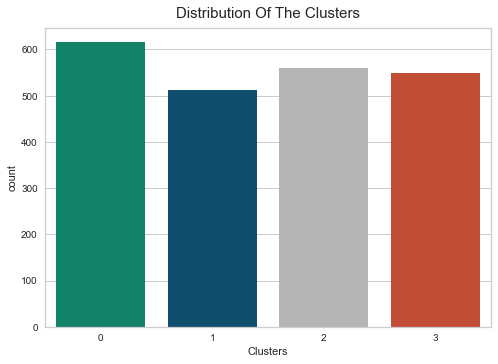

In [115]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters", pad=10, size = 15)
plt.show()

#### Note:
Các cụm này cho thấy một phân bố tương đối đều trên tập dữ liệu. Vì chúng ta đã xác định rằng Thu nhập và Chi tiêu có đóng góp quan trọng cho PC1, nên chúng ta sẽ tạo một biểu đồ của các cụm dựa trên hai biến này.

<a id="sub-7-2"></a>
## 7.2. Clusters based on *Income* and *Total Spent*

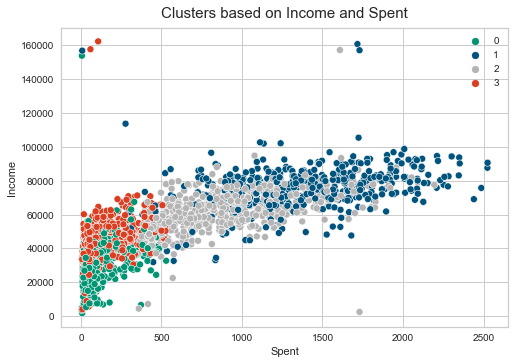

In [116]:
pl = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters'], palette = pal)
pl.set_title('Clusters based on Income and Spent', pad=10, size=15)
plt.legend()
plt.show()

#### Note:
Như đã trình bày ở trên, Thu nhập và Chi tiêu có mối quan hệ mạnh mẽ. Các cụm cho thấy những thông tin chi tiết hơn về các mẫu của chúng:

* Nhóm 0: chi tiêu thấp và thu nhập thấp
* Nhóm 3: chi tiêu thấp và thu nhập trung bình
* Nhóm 2: chi tiêu cao và thu nhập trung bình
* Nhóm 1: chi tiêu cao và thu nhập cao

Để dễ hiểu hơn, chúng ta sẽ phân loại Nhóm 0 là Khách hàng Bình thường, Nhóm 1 là Khách hàng Đặc biệt, Nhóm 2 là Khách hàng Tốt, và Nhóm 3 là Khách hàng có tiềm năng.

In [117]:
#Define name of customer groups according to clusters
re_clust = {
    0: 'Ordinary customer',
    1: 'Elite customer',
    2: 'Good customer',
    3: 'Potential good customer'}
df['Clusters_Customers'] = df['Clusters'].map(re_clust)

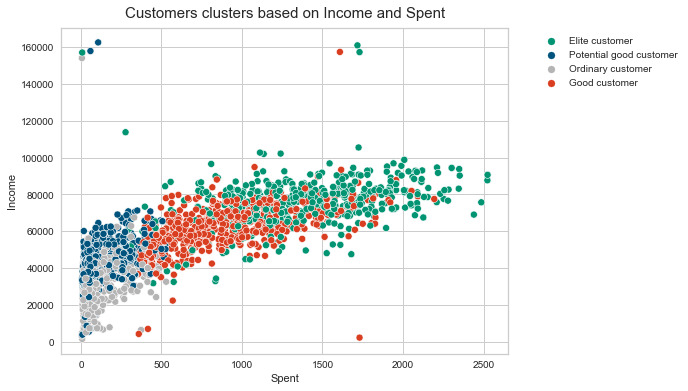

In [118]:
#Plot clusters of customers based on Income and Spent
plt.figure(figsize=(8, 6))
pl = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters_Customers'], palette = pal, s=50)
pl.set_title('Customers clusters based on Income and Spent', pad=10, size=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()
plt.show()

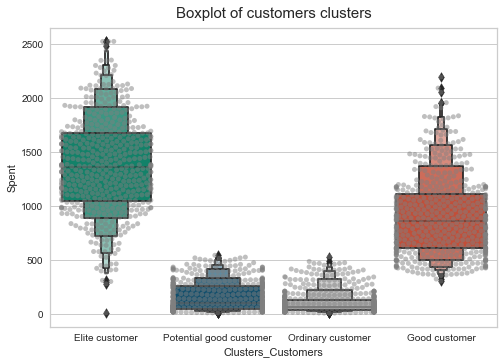

In [119]:
#Plot detailed distribution of cluster through boxplot
plt.figure()
pl=sns.swarmplot(x=df["Clusters_Customers"], y=df["Spent"], color= "gray", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters_Customers"], y=df["Spent"], palette=pal)
pl.set_title("Boxplot of customers clusters", pad=10, size=15)
plt.show()

#### Note:
Biểu đồ hộp cho thấy Khách hàng Đặc biệt và Khách hàng Tốt chi tiêu đáng kể hơn mỗi khách hàng, trung bình là 1400 bảng và 800 bảng tương ứng, so với Khách hàng Bình thường và Khách hàng Có tiềm năng có mức chi tiêu chỉ khoảng 500 bảng. Do đó, các chiến dịch tiếp thị khác nhau sẽ được phát triển cho mỗi nhóm. Để bắt đầu quá trình này, chúng ta sẽ xem xét các chiến dịch tiếp thị trước đây để xem mỗi nhóm đã chi bao nhiêu cho các chiến lược tiếp thị được nhắm mục tiêu.

<a id="sub-7-3"></a>
## 7.3. Clusters based on products spending

In [120]:
#Calculate spending of different products of each customer group

#Group by clusters_customers and calculate total amount of spending by each product
spending_by_product = df.groupby('Clusters_Customers')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()

#Transpose the result
spending_by_product = spending_by_product.transpose()

#Reset the index 
spending_by_product = spending_by_product.reset_index()

#Rename column
spending_by_product = spending_by_product.rename(columns = {'index': 'Category'})

spending_by_product

Clusters_Customers,Category,Elite customer,Good customer,Ordinary customer,Potential good customer
0,Wines,311717,296082,21566,50664
1,Fruits,33061,19127,4078,2487
2,Meat,238063,102359,15992,16961
3,Fish,48808,25407,6229,3487
4,Sweets,33576,20469,4131,2376
5,Gold,37791,40503,11186,8866


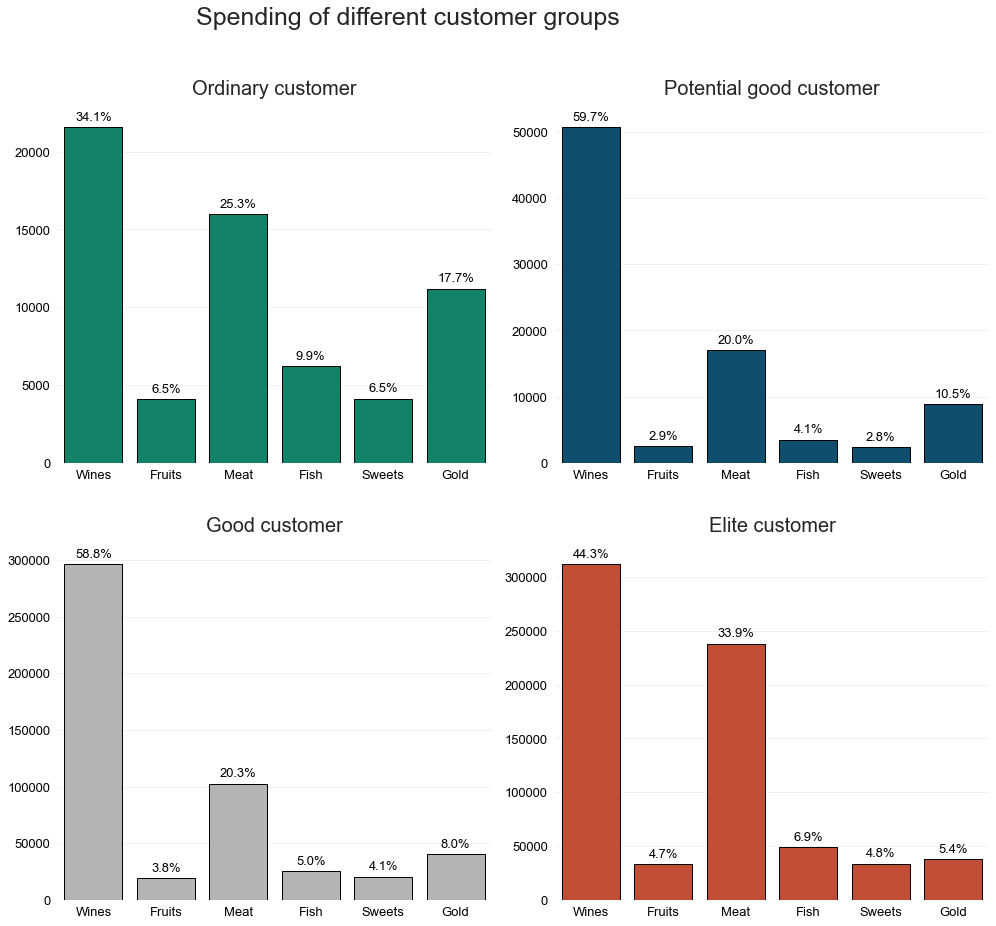

In [121]:
# Plot bar charts
#Creates a figure with 4 subplots using the subplots() function from matplotlib
fig = plt.figure(figsize=(14, 12)) 

#Initializes k=1 and creates a list cl of strings representing the names of each customer cluster
k = 1
cl = ['Ordinary customer', 'Potential good customer', 'Good customer', 'Elite customer']

#
for i in cl:
    #only the columns Category and i are selected, where i is the current iteration of the cl list 
    ass = spending_by_product[['Category', i]]
    
    #create a subplot in a grid with 2 rows and 2 columns, and it sets the current subplot to the k position
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    cluster_color = pal[k-1]
    
    #create barplot using seaborn where x is products in the category, y is the current iteration of the cl list
    a = sns.barplot(data = ass, x = 'Category', y = i, color = cluster_color, linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(size = 13, color = 'black')
    plt.yticks(size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    
    #add annotations to the barplot by percentage of spending amount
    for p in a.patches:
        #set the x-coordinate to the center of the current bar patch
        x_pos = p.get_x() + p.get_width() / 2
        
        #get the height of the current patch
        y_pos = p.get_height()
        
        #calculate percentage of spending amount (current patch) and the total spending of the group
        percentage = round((y_pos / sum(ass[i])) * 100, 1)
        a.annotate(
            f'{percentage}%', #text to be displayed
            xy=(x_pos, y_pos), #position to be placed
            ha='center', va='center', #alignment of the text
            size=13, 
            color='black',
            xytext = (0, 10), 
            textcoords = 'offset points')
    
    #hide spines of the barplot (the right, top, left and bottom borders)
    for spine in ['right', 'top', 'left', 'bottom']:
        a.spines[spine].set_visible(False)
        
    #increment k after iteration of the loop
    k += 1

plt.figtext(0.2, 1.05, 'Spending of different customer groups', size = 25)
fig.tight_layout(h_pad = 3)
plt.show()


#### Note:
* Tất cả bốn nhóm đều chi số tiền cao nhất cho **Rượu**, theo sau là **Thịt**, trong sáu loại sản phẩm khác nhau.
* Về việc mua **Vàng**, **Khách hàng Bình thường** và **Khách hàng Có tiềm năng** có xu hướng làm vậy hơn, với tỷ lệ lần lượt là 17,7% và 10,5%, trong khi hai nhóm còn lại chỉ có tỷ lệ 8% và 5,4%.
* **Khách hàng Đặc biệt**, ngược lại, có xu hướng mua **Thịt** nhiều hơn, chiếm khoảng 240.000 bảng hoặc 33,9% tổng chi tiêu của họ, cao hơn so với chi tiêu của các nhóm khác dưới 26%.
<a id="sub-7-4"></a>
## 7.4. Clusters based on Promotions

In [122]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

# Group the data by cluster and sum the total number of promotions accepted
cluster_promos = df.groupby('Clusters_Customers')[['Total_Promos']].sum().reset_index()

# Calculate the percentage of promotions accepted for each cluster
cluster_promos['Percentage_Promos'] = round(cluster_promos['Total_Promos']*100/ cluster_promos['Total_Promos'].sum(), 2)

cluster_promos


,Clusters_Customers,Total_Promos,Percentage_Promos
0,Elite customer,378,56.76
1,Good customer,178,26.73
2,Ordinary customer,55,8.26
3,Potential good customer,55,8.26


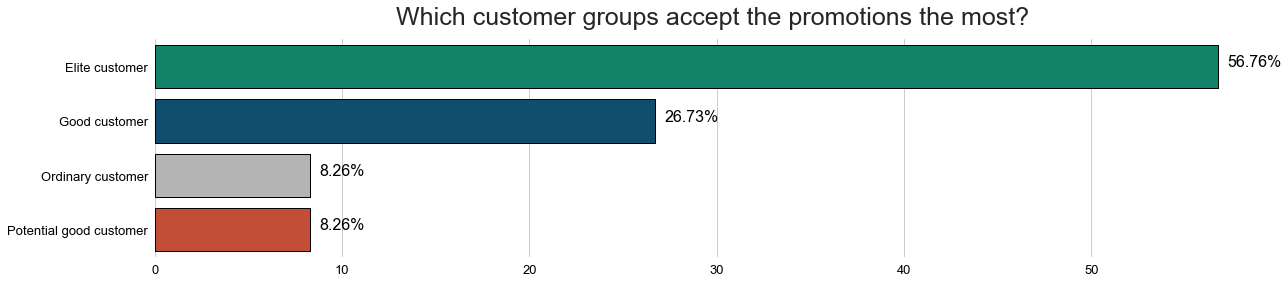

In [123]:
fig = plt.figure(figsize = (20, 4))

# create barplot using seaborn where x is products in the category, y is the current iteration of the cl list
a = sns.barplot(data=cluster_promos, x='Percentage_Promos', y='Clusters_Customers', 
                palette=pal, linestyle="-", linewidth=1, edgecolor="black")
plt.xticks(size=13, color='black')
plt.yticks(size=13, color='black')
plt.title('Which customer groups accept the promotions the most?', pad=15, size=25)
plt.xlabel('')
plt.ylabel('')

# add annotations to the barplot
for i, v in enumerate(cluster_promos['Percentage_Promos']):
    a.text(v + 0.5, i, (str(v)+"%"), color='black', fontsize=16)
    
for j in ['right', 'top', 'left', 'bottom']:
    a.spines[j].set_visible(False)

plt.show()


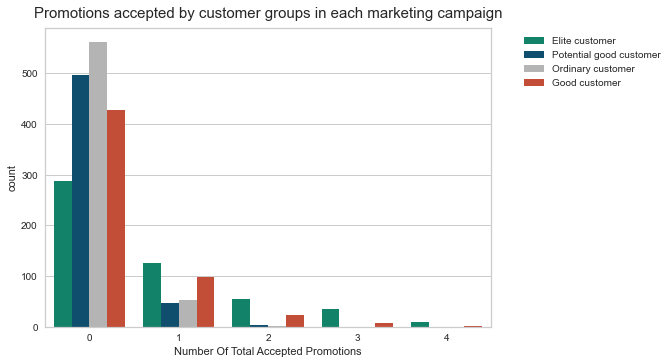

In [124]:
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters_Customers"], palette= pal)
pl.set_title("Promotions accepted by customer groups in each marketing campaign", pad=10, size=15)
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()


#### Note:
* Trong chiến dịch tiếp thị ban đầu, nhóm Khách hàng Bình thường và Khách hàng Có tiềm năng có khoảng 500 lượt chấp nhận mỗi nhóm, trong khi nhóm Khách hàng Tốt và Khách hàng Đặc biệt có 400 và 300 lượt chấp nhận tương ứng.
* Trong các chiến dịch tiếp theo, số lượng khuyến mãi được chấp nhận giảm đáng kể. Khách hàng Bình thường và Khách hàng Có tiềm năng có xu hướng không chấp nhận ưu đãi, trong khi chỉ có một phần nhỏ của Khách hàng Tốt và Khách hàng Đặc biệt chấp nhận nó.
<a id="sub-7-5"></a>
## 7.5. Clusters based on Number of Deals Purchased

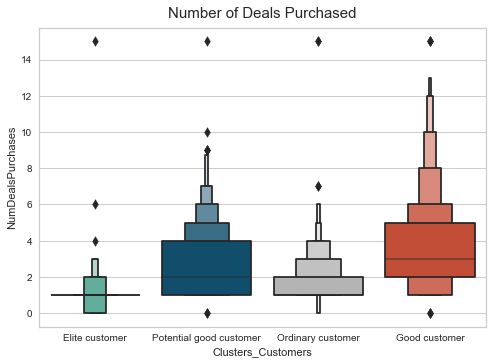

In [125]:
plt.figure()
pl=sns.boxenplot(x=df["Clusters_Customers"], y=df["NumDealsPurchases"], palette= pal)
pl.set_title("Number of Deals Purchased", pad=10, size=15)
plt.show()

#### Note:
Các giao dịch dường như thành công trong các nhóm khách hàng tốt và khách hàng tốt tiềm năng. Tuy nhiên, nhóm khách hàng ưu tú không thể hiện sự quan tâm đến các giao dịch được cung cấp. 

<a id="sec-8"></a>
# 8. PROFILING
Bây giờ chúng tôi đã hình thành các cụm và xem xét thói quen mua hàng của họ. Hãy để chúng tôi xem tất cả những người ở đó trong các cụm này. Vì vậy, chúng tôi sẽ lập hồ sơ các cụm được hình thành và đi đến kết luận về ai là khách hàng ngôi sao của chúng tôi và ai cần sự chú ý nhiều hơn từ nhóm tiếp thị của cửa hàng bán lẻ.

Để quyết định rằng tôi sẽ vẽ một số tính năng biểu thị các đặc điểm cá nhân của khách hàng theo cụm mà họ đang ở. Trên cơ sở kết quả, tôi sẽ đi đến kết luận.

<Figure size 576x396 with 0 Axes>

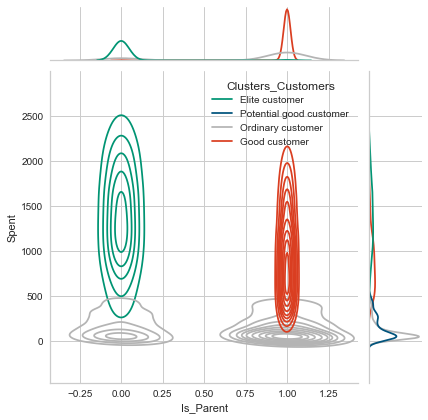

<Figure size 576x396 with 0 Axes>

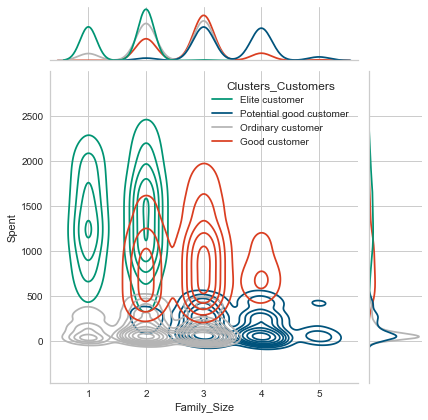

<Figure size 576x396 with 0 Axes>

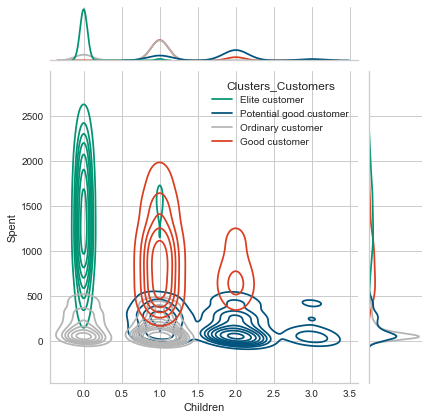

<Figure size 576x396 with 0 Axes>

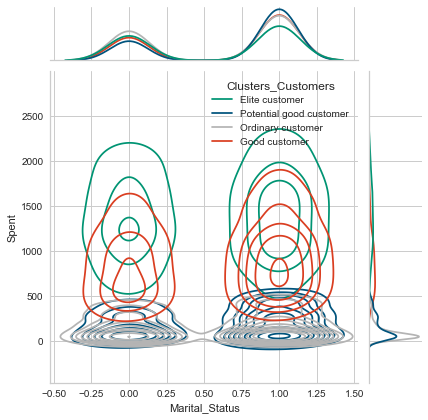

<Figure size 576x396 with 0 Axes>

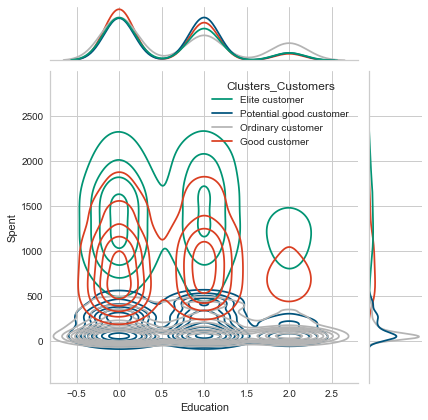

In [127]:
Personal = ["Is_Parent", "Family_Size", "Children",
            "Marital_Status", "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=ds[i], y=df["Spent"], hue =df["Clusters_Customers"], kind="kde", palette=pal)
    plt.show()

### Giải thích:
*1. Nhóm Đặc biệt*
> Chi tiêu cao và thu nhập cao

> Họ chắc chắn không phải là cha mẹ

> Số lượng thành viên trong gia đình tối đa là hai người, không có con

> Họ có hơi nhiều cặp đôi hơn người độc thân

*2. Nhóm Tốt*
> Chi tiêu cao và thu nhập trung bình

> Rất có thể là cha mẹ

> Kích thước gia đình của họ có thể từ hai đến bốn thành viên

> Chủ yếu có một con (hầu hết là thanh thiếu niên)

*3. Nhóm Có tiềm năng*
> Chi tiêu thấp và thu nhập trung bình

> Tất cả đều là cha mẹ

> Kích thước gia đình của họ dao động từ hai đến năm thành viên

> Độ tuổi của họ từ 35 đến khoảng 80 tuổi

*4. Nhóm Bình thường*
> Chi tiêu thấp và thu nhập thấp

> Phần lớn họ là cha mẹ

> Kích thước gia đình tối đa là ba người

> Họ thường có một con (hầu hết là trẻ em)

<a id="sec-9"></a>
# 9. CONCLUSION
Dự án này về phân khúc khách hàng từ một tập dữ liệu không giám sát. Phân tích thành phần chính được sử dụng để giảm xuống chỉ còn 3 chiều. Sáu phương pháp phân cụm được vẽ và tính điểm silhouette để so sánh và tìm ra phương pháp phù hợp nhất là KMeans. 4 nhóm khách hàng được phân cụm và phân tích dựa trên thu nhập và chi tiêu cũng như thông tin cá nhân của họ. Bằng cách đó, các mẫu được xác định có thể hữu ích trong việc phát triển các chiến lược tiếp thị hiệu quả hơn.